In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_eval_matrix(
    mean_eval_matrix, cluster_names, metric
):
    """
    Plots the mean test loss matrix for all clusters, highlighting the diagonal.
    """
    assert (
        mean_eval_matrix.shape[0] == mean_eval_matrix.shape[1]
    ), "Matrix must be square"
    N = mean_eval_matrix.shape[0]

    # 1. Compute the mean of the diagonal (same cluster train-test)
    mean_diagonal = np.mean(np.diag(mean_eval_matrix))
    mean_off_diagonal = np.mean(np.delete(mean_eval_matrix, np.diag_indices(N)))

    # 2. Compute the mean difference for each column
    sum_differences = []
    for i in range(mean_eval_matrix.shape[1]):
        column_values = mean_eval_matrix[:, i]
        diff = column_values[i] - column_values
        sum_diff = np.sum(np.delete(diff, i))
        sum_differences.append(sum_diff)

    consistency = 1 / (N * (N - 1)) * np.sum(np.array(sum_differences))

    print(f"EVALUATION: Mean diagonal {metric}: {mean_diagonal}")
    print(f"EVALUATION: Mean off-diagonal {metric}: {mean_off_diagonal}")
    print(f"EVALUATION: Mean overall {metric}: {np.mean(mean_eval_matrix)}")
    print(f"EVALUATION: Consistency metric: {consistency}")
    print(
        f"EVALUATION: Difference Diag-OffDiag: {mean_diagonal - mean_off_diagonal}"
    )

    # Plot mean test loss matrix
    cmap = "bwr_r" if metric == "SSIM" else "bwr"
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(
        mean_eval_matrix,
        cmap=cmap,
    )
    plt.colorbar(cax, label="MSE (K^2)")
    ax.set_xticks(np.arange(N))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(cluster_names, rotation=45, ha="left")
    ax.set_yticklabels(cluster_names)
    plt.xlabel("Model evaluated on:")
    plt.ylabel("Model trained on: ")
    plt.title(
        f"Model: UNet\n"
        f"Mean Test Loss Matrix {metric}: {np.mean(mean_eval_matrix):.6f},\n"
        f"Mean Diagonal {metric}: {mean_diagonal:.6f},\n"
        f"Mean Non-Diagonal {metric}: {mean_off_diagonal:.6f},\n"
        f"Difference Mean Diag & Mean Non-Diagonal {metric}: {mean_diagonal - mean_off_diagonal:.6f},\n"
        f"Consistency: {consistency:.6f}"
    )

    # Highlight the diagonal cells
    for i in range(N):
        rect = patches.Rectangle(
            (i - 0.5, i - 0.5), 1, 1,
            linewidth=1,
            edgecolor="y",
            facecolor="none",
            alpha=1
        )
        ax.add_patch(rect)

    plt.tight_layout()
    plt.show()
    plt.close(fig)

EVALUATION: Mean diagonal MSE: 0.011693807491849907
EVALUATION: Mean off-diagonal MSE: 0.013621825572739985
EVALUATION: Mean overall MSE: 0.013364272692653174
EVALUATION: Consistency metric: -0.0018223256736035654
EVALUATION: Difference Diag-OffDiag: -0.0019280180808900777


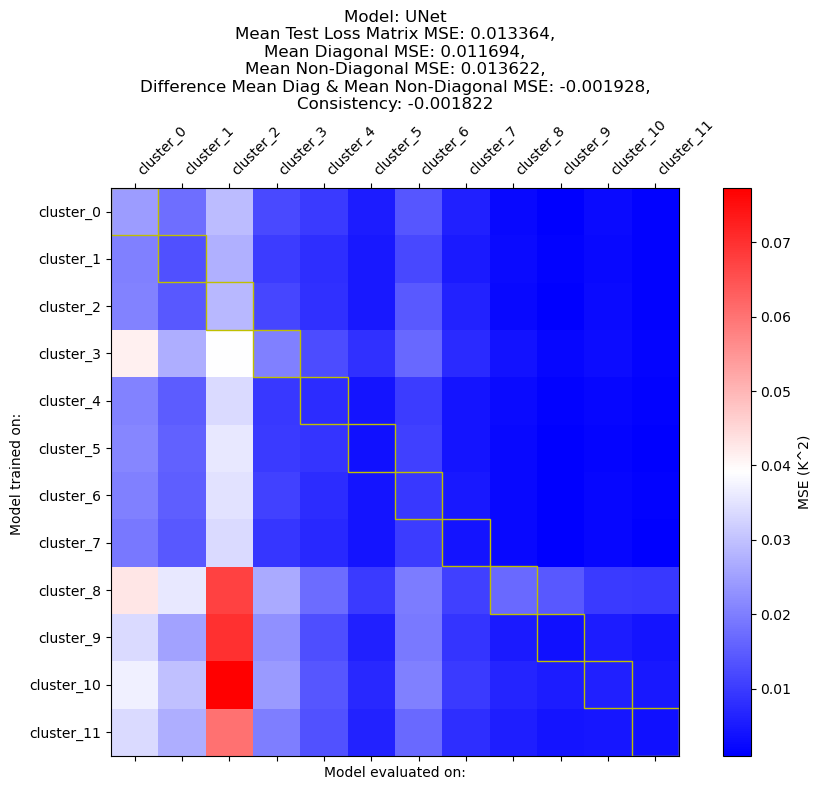

EVALUATION: Mean diagonal SSIM: 0.8427959881614383
EVALUATION: Mean off-diagonal SSIM: 0.8567759086455955
EVALUATION: Mean overall SSIM: 0.8597242677689354
EVALUATION: Consistency metric: -0.018467214117269738
EVALUATION: Difference Diag-OffDiag: -0.013979920484157193


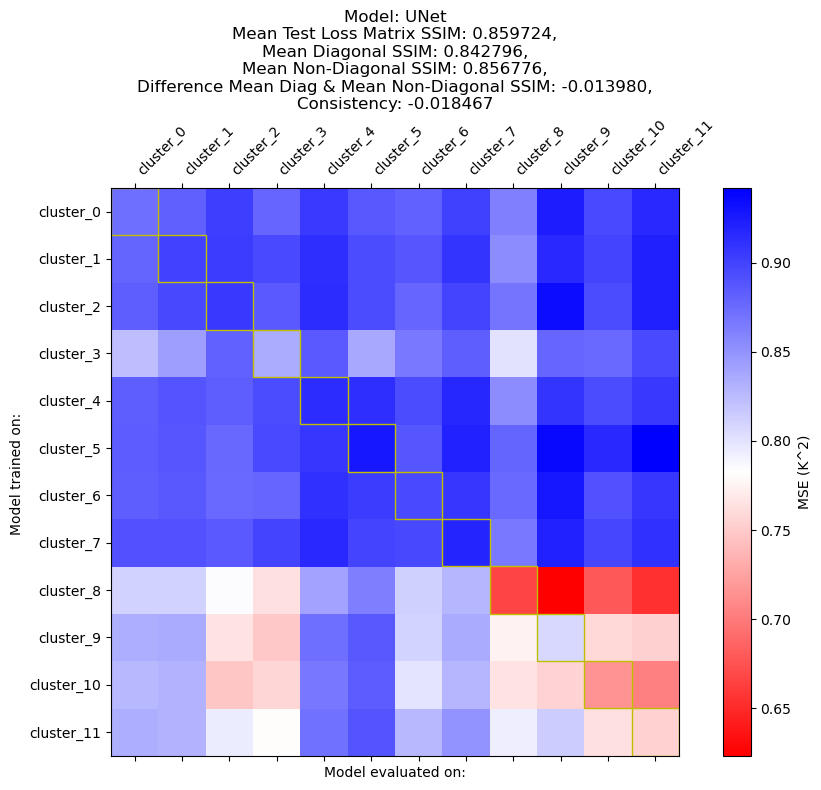

EVALUATION: Mean diagonal sNRMSE: 0.22507143542912003
EVALUATION: Mean off-diagonal sNRMSE: 0.19940193591769653
EVALUATION: Mean overall sNRMSE: 0.19683491328971778
EVALUATION: Consistency metric: 0.030803478697529686
EVALUATION: Difference Diag-OffDiag: 0.0256694995114235


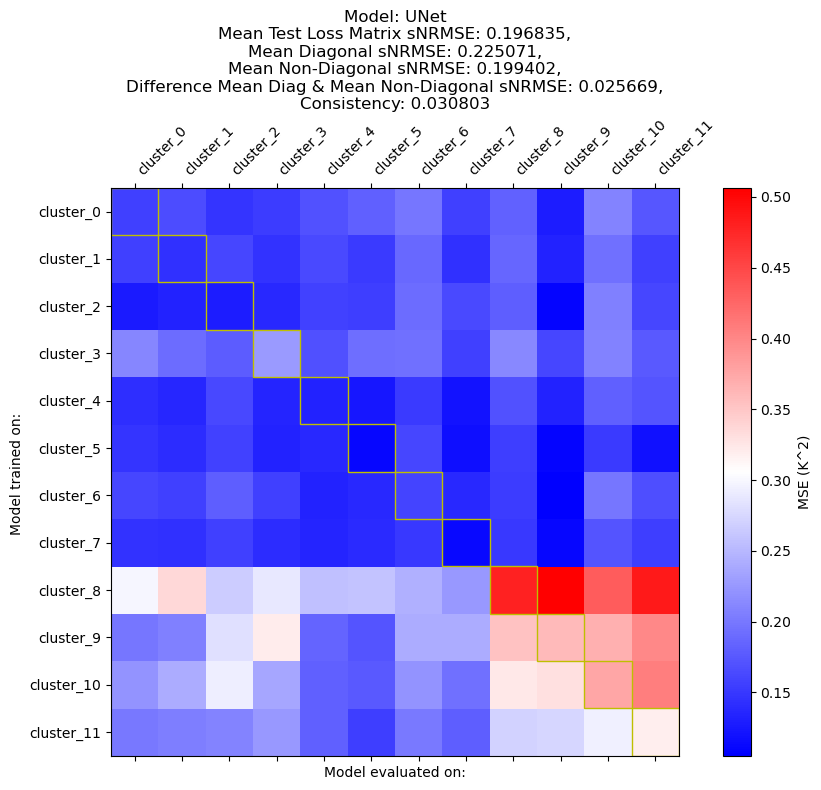

In [40]:
# exp_path = "/scratch/fquareng/experiments/single-10x"
exp_path = "/scratch/fquareng/experiments/single-10x-x16-nn"

directories = os.listdir(exp_path)
cluster_names = [
    "cluster_0",
    "cluster_1",
    "cluster_2",
    "cluster_3",
    "cluster_4",
    "cluster_5",
    "cluster_6",
    "cluster_7",
    "cluster_8",
    "cluster_9",
    "cluster_10",
    "cluster_11",
]

list_MSE_matrix = []
list_SSIM_matrix = []
list_sNRMSE_matrix = []
for d in directories:
    list_MSE_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "MSE_matrix.npy")))
    list_SSIM_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "SSIM_matrix.npy")))
    list_sNRMSE_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "sNRSME_matrix.npy")))

mean_SSIM_matrix = np.mean(np.stack(list_SSIM_matrix, axis=2), axis=2)
mean_MSE_matrix = np.mean(np.stack(list_MSE_matrix, axis=2), axis=2)
mean_sNRMSE_matrix = np.mean(np.stack(list_sNRMSE_matrix, axis=2), axis=2)

plot_eval_matrix(mean_MSE_matrix, cluster_names=cluster_names, metric="MSE")
plot_eval_matrix(mean_SSIM_matrix, cluster_names=cluster_names, metric="SSIM")
plot_eval_matrix(mean_sNRMSE_matrix, cluster_names=cluster_names, metric="sNRMSE")

In [41]:
def standardize(matrix):
    # Standardize each row between 0 and 1
    row_min = matrix.min(axis=1, keepdims=True)
    row_max = matrix.max(axis=1, keepdims=True)
    denominator = row_max - row_min
    # To avoid division by zero if all elements in the row are identical
    denominator[denominator == 0] = 1
    return (matrix - row_min) / denominator

EVALUATION: Mean diagonal MSE: 0.29024772889555633
EVALUATION: Mean off-diagonal MSE: 0.2582613003843184
EVALUATION: Mean overall MSE: 0.2643007179666182
EVALUATION: Consistency metric: 0.028305830104296183
EVALUATION: Difference Diag-OffDiag: 0.03198642851123795


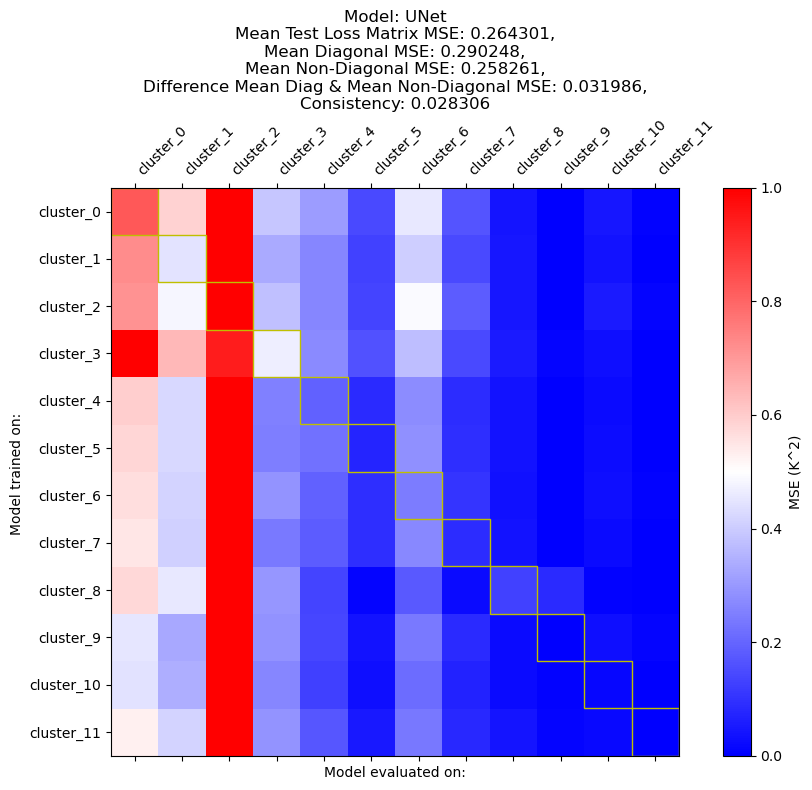

EVALUATION: Mean diagonal SSIM: 0.46278370697246674
EVALUATION: Mean off-diagonal SSIM: 0.5213844406554119
EVALUATION: Mean overall SSIM: 0.5187716258552404
EVALUATION: Consistency metric: -0.061077729690298524
EVALUATION: Difference Diag-OffDiag: -0.05860073368294516


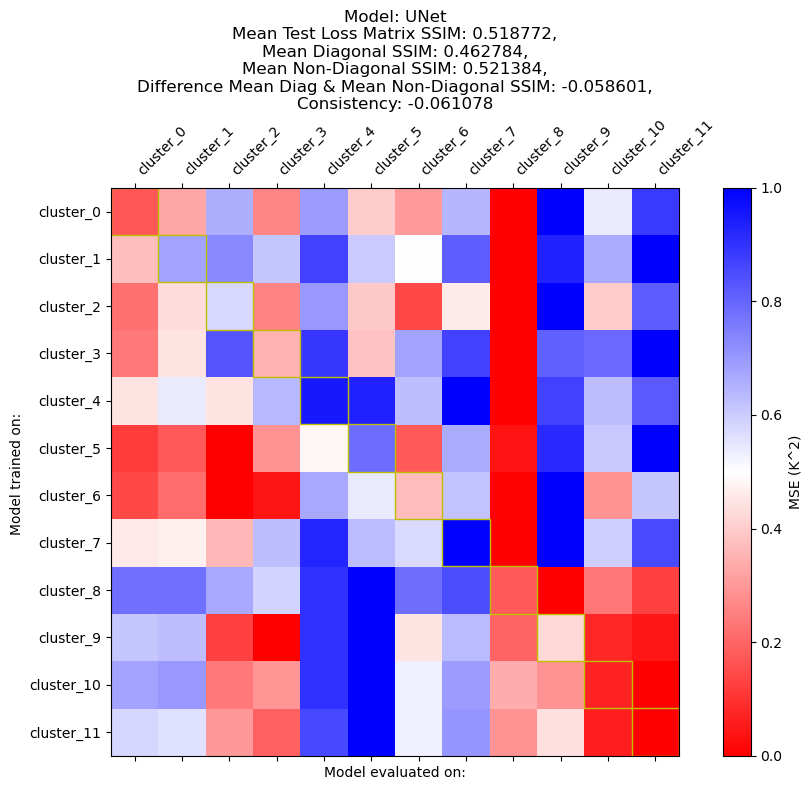

EVALUATION: Mean diagonal sNRMSE: 0.5128057305245336
EVALUATION: Mean off-diagonal sNRMSE: 0.4631135205752755
EVALUATION: Mean overall sNRMSE: 0.46640043570931095
EVALUATION: Consistency metric: 0.05062395798024283
EVALUATION: Difference Diag-OffDiag: 0.049692209949258104


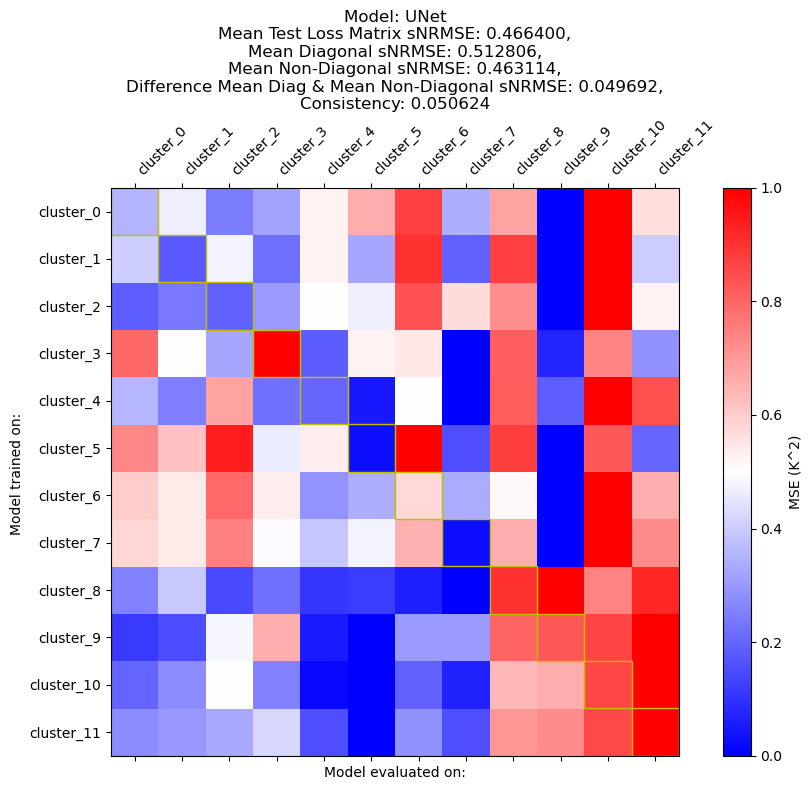

In [42]:
list_MSE_matrix = []
list_SSIM_matrix = []
list_sNRMSE_matrix = []
for d in directories:
    list_MSE_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "MSE_matrix.npy")))
    list_SSIM_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "SSIM_matrix.npy")))
    list_sNRMSE_matrix.append(np.load(os.path.join(exp_path, d, "evaluation_results", "sNRSME_matrix.npy")))

mean_SSIM_matrix = np.mean(np.stack(list_SSIM_matrix, axis=2), axis=2)
mean_MSE_matrix = np.mean(np.stack(list_MSE_matrix, axis=2), axis=2)
mean_sNRMSE_matrix = np.mean(np.stack(list_sNRMSE_matrix, axis=2), axis=2)

plot_eval_matrix(standardize(mean_MSE_matrix), cluster_names=cluster_names, metric="MSE")
plot_eval_matrix(standardize(mean_SSIM_matrix), cluster_names=cluster_names, metric="SSIM")
plot_eval_matrix(standardize(mean_sNRMSE_matrix), cluster_names=cluster_names, metric="sNRMSE")